# **Algoritmo Genético**

## **Marcos Damián Pool Canul** & **Oscar Manuel Ruiz Reyes**

In [207]:
import networkx as nx
import pandas as pd
import heapq as pq
import matplotlib.pyplot as plt
from random import randint, choice, random
from tabulate import tabulate

### Paso 1: Definir el número de vértices

In [208]:
# Numero de vertices
numero_vertices = 8

# Tamaño de la poblacion
poblacion_size = 10

# Numero de generaciones
generaciones = 100

# Mejores individuos
n_elite = 2

# Los colores posibles
colores = ['red', 'green', 'blue']

### Paso 2: Colorear los vertices aleatoriamente

In [209]:
def colorear_nodos(G, colores):
    for nodo in G.nodes():
        # Asignar un color aleatorio a cada nodo
        G.nodes[nodo]['color'] = choice(colores)
    return G

In [210]:
def guardar_colores(G, nodo_inicial=0):
    """
		Realiza un recorrido DFS en el grafo G y devuelve una secuencia de nodos visitados con sus respectivos colores.
    """

    # Lista para almacenar el número de nodo y el color
    secuencia_colores = []

    # Set para mantener un registro de los nodos visitados
    visitados = set()

    def dfs(nodo):
        if nodo not in visitados:
            visitados.add(nodo)
            # Suponiendo que cada nodo tiene un atributo 'color'
            secuencia_colores.append((G.nodes[nodo].get('color', None)))
            for vecino in G[nodo]:
                dfs(vecino)

    # Iniciar DFS desde el nodo inicial
    dfs(nodo_inicial)

    return secuencia_colores

### Paso 3: Controlar la impresión del grafo

In [211]:
def grafo_conectado(numero_vertices):
    """
    Crea un grafo conectado con un numero de vertices.
    """
    G = nx.Graph()
    G.add_nodes_from(range(numero_vertices))

    for i in range(1, numero_vertices):
        G.add_edge(i - 1, i)

    if numero_vertices > 4:
        for i in range(numero_vertices):
            for j in range(i + 2, min(i + numero_vertices // 3, numero_vertices)):
                G.add_edge(i, j)

        G.add_edge(0, numero_vertices // 3)
        G.add_edge(numero_vertices // 2, numero_vertices - 1)

        if numero_vertices > 6:
            G.add_edge(numero_vertices - 1, numero_vertices // 4)
            G.add_edge(numero_vertices - 2, numero_vertices // 2)

    return G

In [212]:
def dibujar_grafo(G, titulo):
    """
    Dibuja el grafo G con el titulo dado.
    """
    plt.figure(figsize=(8, 6))
    # Kamada-Kawai layout para dibujar el grafo
    posiciones = nx.kamada_kawai_layout(G)
    mapa_colores = [G.nodes[nodo]['color'] for nodo in G.nodes()]
    nx.draw(G, pos=posiciones, with_labels=True,
            node_color=mapa_colores, node_size=500, font_size=10)
    plt.title(titulo)
    plt.show()

### Paso 4: Generar la población

In [213]:
def generar_poblacion(numero_vertices, poblacion_size):
    # Generar una poblacion de grafos coloreados
    poblacion = {}
    # color_grafo = {}
    color_grafo = [None] * poblacion_size
    for i in range(poblacion_size):
        G = grafo_conectado(numero_vertices)
        G = colorear_nodos(G, colores)
        color_grafo[i] = guardar_colores(G)
        poblacion[(i)] = G
    return poblacion, color_grafo

In [214]:
poblacion, colors = generar_poblacion(numero_vertices, poblacion_size)

In [215]:
poblacion

{0: <networkx.classes.graph.Graph at 0x18374961210>,
 1: <networkx.classes.graph.Graph at 0x1836ff2fcd0>,
 2: <networkx.classes.graph.Graph at 0x183748ba990>,
 3: <networkx.classes.graph.Graph at 0x183748b9c90>,
 4: <networkx.classes.graph.Graph at 0x183748bac90>,
 5: <networkx.classes.graph.Graph at 0x183748d6dd0>,
 6: <networkx.classes.graph.Graph at 0x183748d7f50>,
 7: <networkx.classes.graph.Graph at 0x183748d7c50>,
 8: <networkx.classes.graph.Graph at 0x183748d42d0>,
 9: <networkx.classes.graph.Graph at 0x183749410d0>}

In [216]:
colors

[['blue', 'blue', 'red', 'blue', 'green', 'red', 'green', 'green'],
 ['blue', 'green', 'green', 'red', 'blue', 'blue', 'blue', 'blue'],
 ['blue', 'blue', 'blue', 'green', 'green', 'red', 'red', 'green'],
 ['red', 'blue', 'red', 'blue', 'blue', 'red', 'red', 'green'],
 ['green', 'blue', 'blue', 'green', 'blue', 'blue', 'red', 'green'],
 ['blue', 'blue', 'blue', 'green', 'red', 'green', 'red', 'green'],
 ['red', 'red', 'green', 'red', 'blue', 'blue', 'red', 'blue'],
 ['green', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'blue'],
 ['green', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'red'],
 ['blue', 'blue', 'red', 'red', 'green', 'red', 'red', 'blue']]

### Paso 5: Calcular el fitness

In [217]:
def calcular_fitness(G):
    """
    Calcula el fitness de un grafo coloreado.
    """
    errores = 0
    for u, v in G.edges():
        if G.nodes[u]['color'] == G.nodes[v]['color']:
            errores += 1
    return errores

In [218]:
fitness_grafos = [None] * poblacion_size

for i in range(poblacion_size):
	fitness_grafos[i] = calcular_fitness(poblacion[i])

In [219]:
cromosomas = {}

for i in range(poblacion_size):
		cromosomas[poblacion[i]] = calcular_fitness(poblacion[i])

In [220]:
fitness_grafos

[4, 6, 6, 3, 2, 4, 3, 4, 5, 3]

In [221]:
cromosomas

{<networkx.classes.graph.Graph at 0x18374961210>: 4,
 <networkx.classes.graph.Graph at 0x1836ff2fcd0>: 6,
 <networkx.classes.graph.Graph at 0x183748ba990>: 6,
 <networkx.classes.graph.Graph at 0x183748b9c90>: 3,
 <networkx.classes.graph.Graph at 0x183748bac90>: 2,
 <networkx.classes.graph.Graph at 0x183748d6dd0>: 4,
 <networkx.classes.graph.Graph at 0x183748d7f50>: 3,
 <networkx.classes.graph.Graph at 0x183748d7c50>: 4,
 <networkx.classes.graph.Graph at 0x183748d42d0>: 5,
 <networkx.classes.graph.Graph at 0x183749410d0>: 3}

In [222]:

claves = list(cromosomas.keys())
valores = list(cromosomas.values())

In [242]:
print(valores[0])

4


In [223]:
for i, (graph, fitness) in enumerate(cromosomas.items()):
	print(f'Cromosoma numero {i}: Fitnes = {fitness}')


Cromosoma numero 0: Fitnes = 4
Cromosoma numero 1: Fitnes = 6
Cromosoma numero 2: Fitnes = 6
Cromosoma numero 3: Fitnes = 3
Cromosoma numero 4: Fitnes = 2
Cromosoma numero 5: Fitnes = 4
Cromosoma numero 6: Fitnes = 3
Cromosoma numero 7: Fitnes = 4
Cromosoma numero 8: Fitnes = 5
Cromosoma numero 9: Fitnes = 3


#### Exportamos a un archivo CSV

In [224]:
df = pd.DataFrame({
    'Grafo': claves,
    'Colores': colors,
    'Fitness': fitness_grafos
})

df.to_csv('Grafos.csv', index=False)

df

,Grafo,Colores,Fitness
0,"(0, 1, 2, 3, 4, 5, 6, 7)","[blue, blue, red, blue, green, red, green, green]",4
1,"(0, 1, 2, 3, 4, 5, 6, 7)","[blue, green, green, red, blue, blue, blue, blue]",6
2,"(0, 1, 2, 3, 4, 5, 6, 7)","[blue, blue, blue, green, green, red, red, green]",6
3,"(0, 1, 2, 3, 4, 5, 6, 7)","[red, blue, red, blue, blue, red, red, green]",3
4,"(0, 1, 2, 3, 4, 5, 6, 7)","[green, blue, blue, green, blue, blue, red, gr...",2
5,"(0, 1, 2, 3, 4, 5, 6, 7)","[blue, blue, blue, green, red, green, red, green]",4
6,"(0, 1, 2, 3, 4, 5, 6, 7)","[red, red, green, red, blue, blue, red, blue]",3
7,"(0, 1, 2, 3, 4, 5, 6, 7)","[green, blue, red, red, red, blue, blue, blue]",4
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[green, blue, red, red, blue, blue, blue, red]",5
9,"(0, 1, 2, 3, 4, 5, 6, 7)","[blue, blue, red, red, green, red, red, blue]",3


#### Probamos los grafos

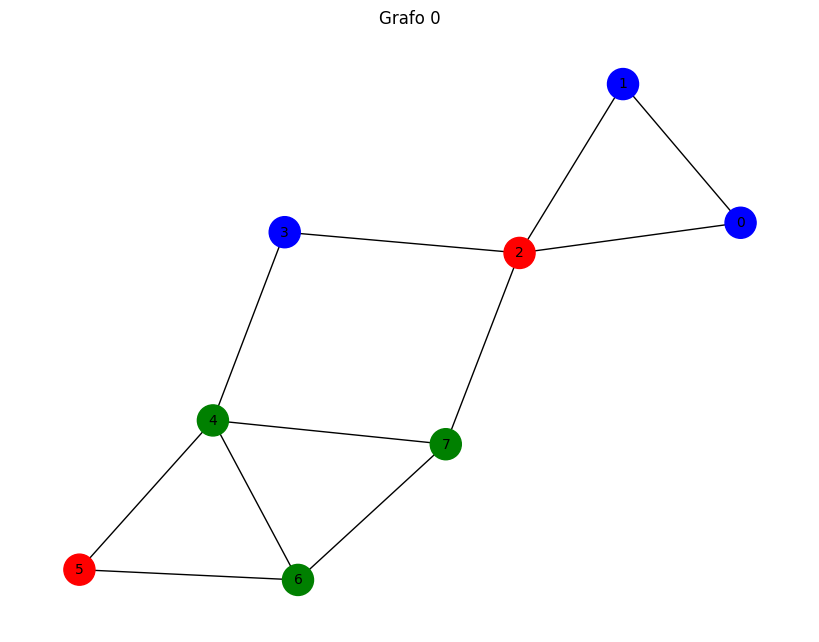

4

In [225]:
dibujar_grafo(claves[0], 'Grafo 0')
calcular_fitness(claves[0])

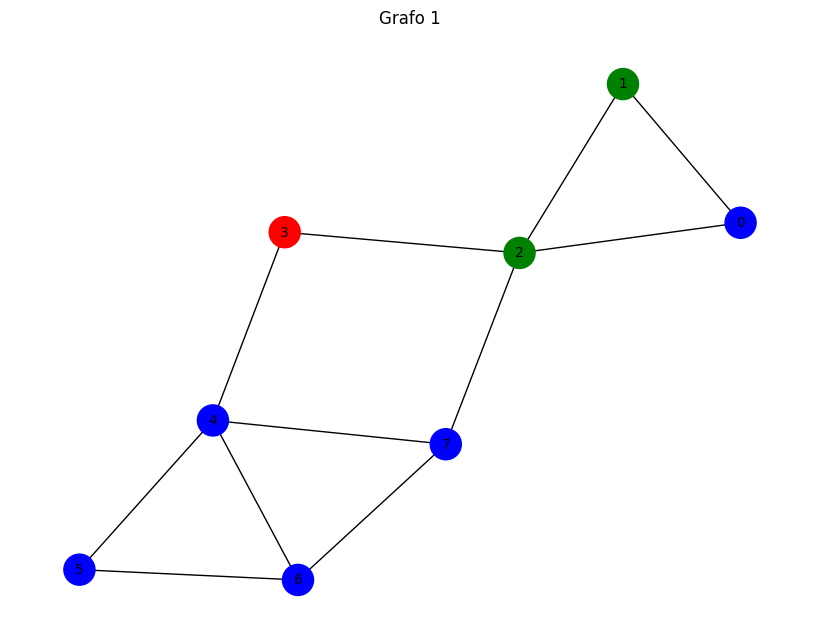

6

In [226]:
dibujar_grafo(claves[1], 'Grafo 1')
calcular_fitness(claves[1])

### Paso 6: Reproducción

In [227]:
df.head(10)

,Grafo,Colores,Fitness
0,"(0, 1, 2, 3, 4, 5, 6, 7)","[blue, blue, red, blue, green, red, green, green]",4
1,"(0, 1, 2, 3, 4, 5, 6, 7)","[blue, green, green, red, blue, blue, blue, blue]",6
2,"(0, 1, 2, 3, 4, 5, 6, 7)","[blue, blue, blue, green, green, red, red, green]",6
3,"(0, 1, 2, 3, 4, 5, 6, 7)","[red, blue, red, blue, blue, red, red, green]",3
4,"(0, 1, 2, 3, 4, 5, 6, 7)","[green, blue, blue, green, blue, blue, red, gr...",2
5,"(0, 1, 2, 3, 4, 5, 6, 7)","[blue, blue, blue, green, red, green, red, green]",4
6,"(0, 1, 2, 3, 4, 5, 6, 7)","[red, red, green, red, blue, blue, red, blue]",3
7,"(0, 1, 2, 3, 4, 5, 6, 7)","[green, blue, red, red, red, blue, blue, blue]",4
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[green, blue, red, red, blue, blue, blue, red]",5
9,"(0, 1, 2, 3, 4, 5, 6, 7)","[blue, blue, red, red, green, red, red, blue]",3


In [228]:
# Seleccionar los mejores cromosomas
df_sorted = df.sort_values(by='Fitness').head(2)
df_sorted

,Grafo,Colores,Fitness
4,"(0, 1, 2, 3, 4, 5, 6, 7)","[green, blue, blue, green, blue, blue, red, gr...",2
3,"(0, 1, 2, 3, 4, 5, 6, 7)","[red, blue, red, blue, blue, red, red, green]",3


In [229]:
# Obtener los colores de los dos grafos con menor fitness
colores_padre_1 = df_sorted.iloc[0]['Colores']
colores_padre_2 = df_sorted.iloc[1]['Colores']

# Combinar la mitad de los colores de cada padre para formar el nuevo grafo
nueva_lista_colores = colores_padre_1[:len(
    colores_padre_1)//2] + colores_padre_2[len(colores_padre_2)//2:]

nueva_lista_colores

['green', 'blue', 'blue', 'green', 'blue', 'red', 'red', 'green']

In [230]:
def colorear_nodos2(G, colores):
    """
    Asigna colores de una lista a los nodos del grafo en orden.
    """
    # Asegurar que hay suficientes colores para los nodos
    if len(colores) < len(G.nodes()):
        raise ValueError("No hay suficientes colores para todos los nodos")

    for nodo, color in zip(G.nodes(), colores):
        G.nodes[nodo]['color'] = color

    return G

In [231]:
X = grafo_conectado(numero_vertices)

In [232]:
X = colorear_nodos2(X, nueva_lista_colores)

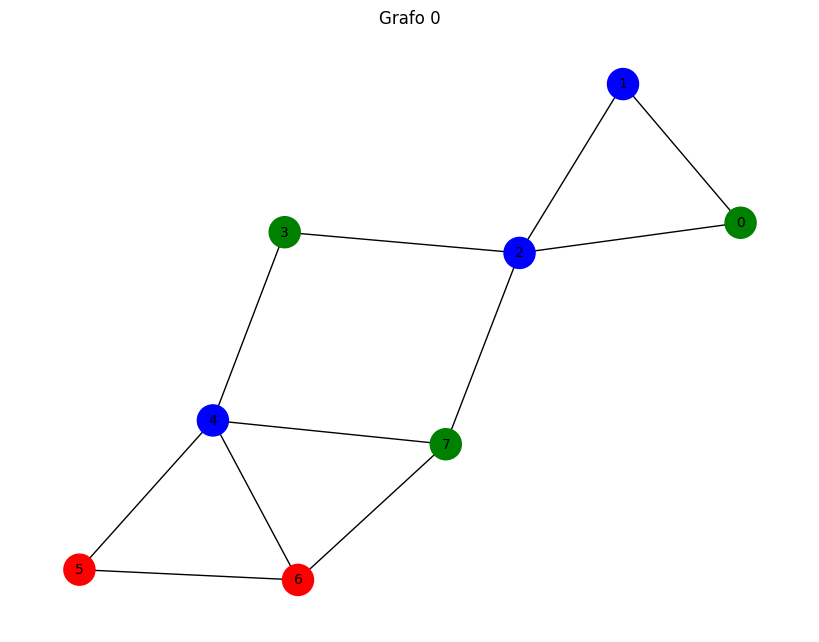

In [233]:
dibujar_grafo(X, 'Grafo 0')

In [234]:
calcular_fitness(X)

2

### Paso 7: Mutación

In [235]:
def algoritmo_Brelaz(G):
    """
    Aplica el algoritmo de Brelaz para colorear el grafo.
    """
    # Inicializar el color de todos los nodos a None
    color = {node: None for node in G.nodes()}

    # Mientras haya nodos sin color
    while None in color.values():
        # Ordenar los nodos por grado de saturación y luego por grado
        nodes = sorted(G.nodes(), key=lambda x: (sum(
            color[neighbor] is not None for neighbor in G.neighbors(x)), G.degree(x)), reverse=True)
        # Seleccionar el primer nodo que no tiene color
        for node in nodes:
            if color[node] is None:
                break
        # Encuentra el primer color que no utilizan los vértices adyacentes
        for c in range(len(G.nodes())):
            if all(color[neighbor] != c for neighbor in G.neighbors(node)):
                color[node] = c
                break

    # Después de que todos los nodos han sido coloreados, calcular e imprimir el grado de saturación de cada nodo
    for node in G.nodes():
        saturation_degree = len(set(color[neighbor] for neighbor in G.neighbors(
            node) if color[neighbor] is not None))
        print(f"El grado de saturación del nodo {node} es {saturation_degree}")

    return color

In [236]:
def coloreo_brelaz(G, colores):
    """
    Aplica el algoritmo de Brelaz para colorear el grafo.
    """
    # Llamar a la función brelaz_algorithm
    color = algoritmo_Brelaz(G)

    # Asignar los colores al grafo
    for vertex in color:
        G.nodes[vertex]['color'] = colores[color[vertex] % len(colores)]

    return G

In [237]:
algoritmo_Brelaz(X)

El grado de saturación del nodo 0 es 2
El grado de saturación del nodo 1 es 2
El grado de saturación del nodo 2 es 2
El grado de saturación del nodo 3 es 1
El grado de saturación del nodo 4 es 2
El grado de saturación del nodo 5 es 2
El grado de saturación del nodo 6 es 2
El grado de saturación del nodo 7 es 2


{0: 1, 1: 2, 2: 0, 3: 1, 4: 0, 5: 1, 6: 2, 7: 1}

In [238]:
Z = coloreo_brelaz(X, colores)

El grado de saturación del nodo 0 es 2
El grado de saturación del nodo 1 es 2
El grado de saturación del nodo 2 es 2
El grado de saturación del nodo 3 es 1
El grado de saturación del nodo 4 es 2
El grado de saturación del nodo 5 es 2
El grado de saturación del nodo 6 es 2
El grado de saturación del nodo 7 es 2


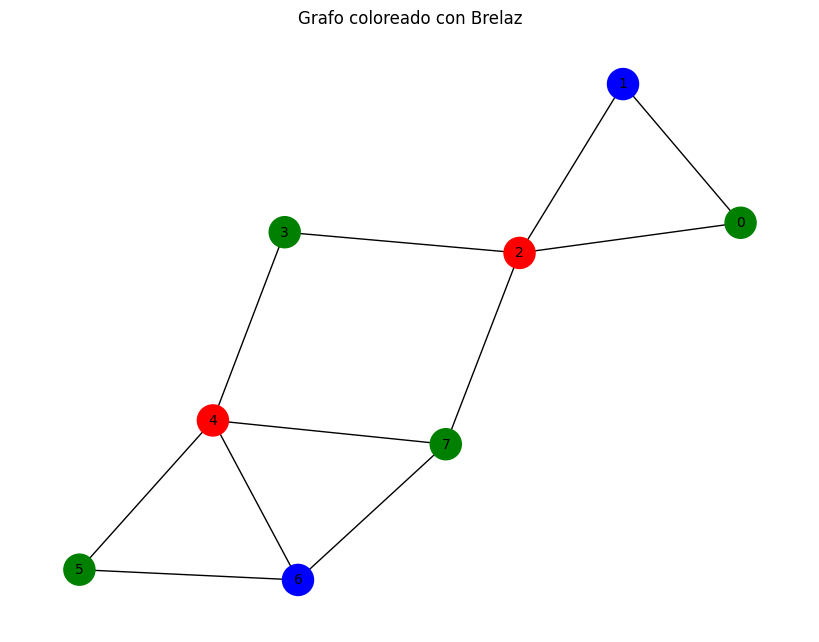

In [239]:
dibujar_grafo(Z, 'Grafo coloreado con Brelaz')

In [240]:
calcular_fitness(Z)

0

In [265]:
nuevo_diccionario = {}

# Agrega el nuevo grafo Z con su fitness al diccionario
nuevo_diccionario[Z] = calcular_fitness(Z)

nuevo_diccionario


{<networkx.classes.graph.Graph at 0x183748ff7d0>: 0}

In [267]:
nuevo_diccionario

{<networkx.classes.graph.Graph at 0x18374961210>: 4,
 <networkx.classes.graph.Graph at 0x1836ff2fcd0>: 6,
 <networkx.classes.graph.Graph at 0x183748ba990>: 6,
 <networkx.classes.graph.Graph at 0x183748b9c90>: 3,
 <networkx.classes.graph.Graph at 0x183748bac90>: 2,
 <networkx.classes.graph.Graph at 0x183748d6dd0>: 4,
 <networkx.classes.graph.Graph at 0x183748d7f50>: 3,
 <networkx.classes.graph.Graph at 0x183748d7c50>: 4,
 <networkx.classes.graph.Graph at 0x183748d42d0>: 5,
 <networkx.classes.graph.Graph at 0x183749410d0>: 3}

# **Algorito Genetico**